[View in Colaboratory](https://colab.research.google.com/github/gatchaman-20140215/machine-learning/blob/master/Google%20Colaboratory/StatsModels%E3%81%AB%E3%82%88%E3%82%8B%E9%87%8D%E5%9B%9E%E5%B8%B0%E8%A7%A3%E6%9E%90.ipynb)

scikit-learnを用いた重回帰解析の例はよく見られますが、ここでは、StatsModelsを用いて重回帰解析を行います。

$$y = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{i=0}^{m}w_ix_i=w^Tx$$

# データの準備
Housingデータセットの特徴量
* CRIM：犯罪発生率
* ZN：25,000兵法フィールド以上の住宅区画の割合
* INDUS：非小売業の土地面積の割合（人口単位）
* CHRS：チャールズ川沿いかどうか
* NOX：窒素酸化物の濃度（pphm単位）
* AGE：1940年よりも前に建てられた家屋の割合
* DIS：ボストンの主な5つの雇用圏までの重み付きの距離
* RAD：幹線道路へのアクセス指数
* TAX：10,000ドル当たりの所得税率
* PTRATIO：教師当たりの生徒数（人工単位）
* B：$1000(Bk-0.63)^2$として計算、$Bk$はアフリカ系アメリカ人居住者の割合（人口単位）
* LSTAT：低所得者の割合
* MDEV：住宅価格の中央値（単位1,000ドル）

## データのダウンロード

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## データセットの可視化

### 散布図行列

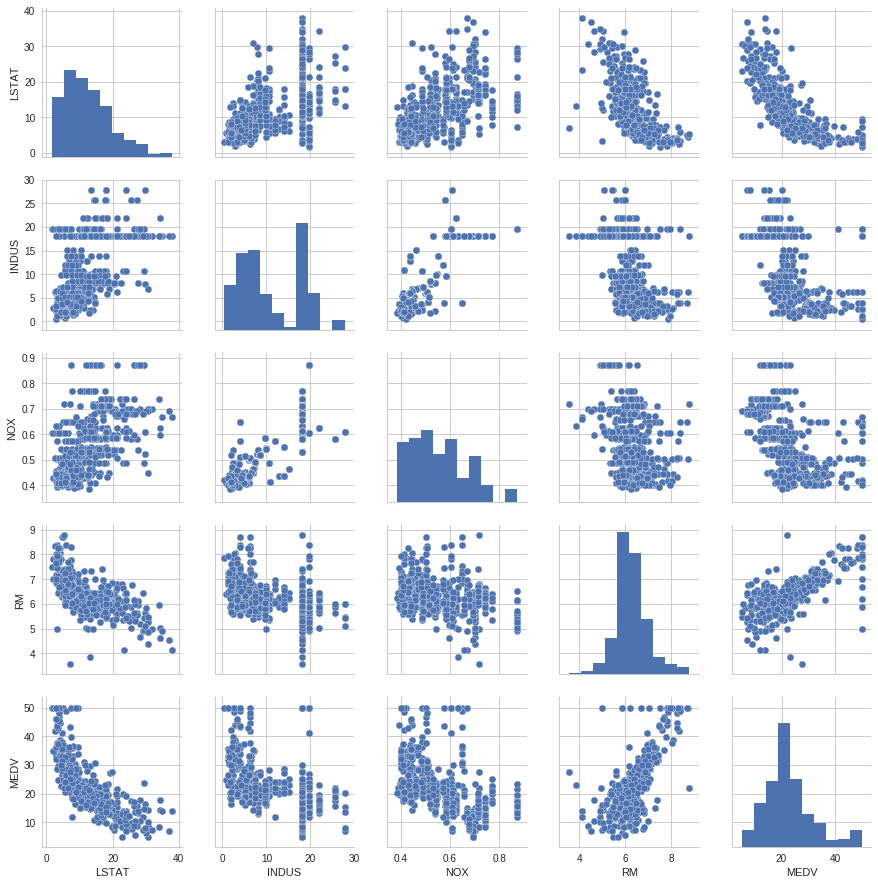

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()

### 相関行列のヒートマップ

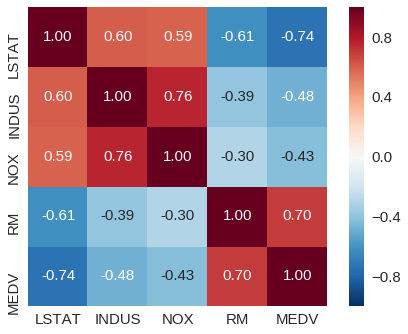

In [3]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

### 部屋数と価格の散布図とヒストグラム

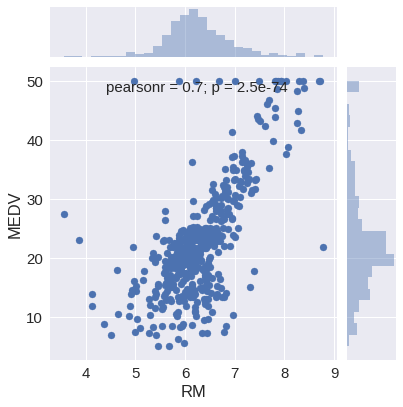

In [4]:
sns.jointplot('RM', 'MEDV', data=df)
plt.show()

# 重回帰解析

In [5]:
import statsmodels.api as sm

X = df.drop('MEDV', 1)
X = sm.add_constant(X)
Y = df['MEDV']
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 13 Aug 2018   Prob (F-statistic):          6.72e-135
Time:                        08:41:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* 決定係数（R-squared）：0.741
* 自由度調整済み決定係数（Adj. R-squared）：0.734
* 有意F（Prob (F-statistic)）：6.72e-135
* 各係数のP値：-0.1080, 0.0464, 0.0206, -17.7666, ...

In [6]:
print('重決定R2:{:.4f}, 補正R2:{:.4f}, 有意F:{:.4f}, 切片:{:.4f}, 係数1:{:.4f}, P値1:{:.4f}, 係数2:{:.4f}, P値2:{:.4f}, ...'.format(
    result.rsquared, result.rsquared_adj, result.f_pvalue,
    result.params[0], result.params[1], result.pvalues[1], result.params[2], result.pvalues[2]))

重決定R2:0.7406, 補正R2:0.7338, 有意F:0.0000, 切片:36.4595, 係数1:-0.1080, P値1:0.0011, 係数2:0.0464, P値2:0.0008, ...


In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

df.to_excel('housing.xlsx')

upload_file_2 = drive.CreateFile()
upload_file_2.SetContentFile('housing.xlsx')
upload_file_2.Upload()

Excelでの解析結果

| 回帰統計  |             |
|-----------|-------------|
| 重相関 R  | 0.860605987 |
| 重決定 R2 | 0.740642664 |
| 補正 R2   | 0.733789726 |
| 標準誤差  | 4.745298182 |
| 観測数    | 506         |

| 分散分析表 |        |             |             |                  |           |
|------------|--------|-------------|-------------|------------------|-----------|
|            | 自由度 | 変動        | 分散        | 観測された分散比 | 有意 F    |
| 回帰       | 13     | 31637.51084 | 2433.65468  | 108.0766662      | 6.72E-135 |
| 残差       | 492    | 11078.78458 | 22.51785483 |                  |           |
| 合計       | 505    | 42716.29542 |             |                  |           |


|| 係数    | 標準誤差     | t           | P-値         | 下限 95%    | 上限 95%     | 下限 95.0%   | 上限 95.0%   |              |
|---------|--------------|-------------|--------------|-------------|--------------|--------------|--------------|--------------|
| 切片    | 36.45948839  | 5.103458811 | 7.144074193  | 3.28E-12    | 26.43222601  | 46.48675076  | 26.43222601  | 46.48675076  |
| CRIM    | -0.108011358 | 0.032864994 | -3.286516871 | 0.00108681  | -0.172584412 | -0.043438304 | -0.172584412 | -0.043438304 |
| ZN      | 0.046420458  | 0.013727462 | 3.381576282  | 0.00077811  | 0.019448778  | 0.073392139  | 0.019448778  | 0.073392139  |
| INDUS   | 0.020558626  | 0.061495689 | 0.334310042  | 0.738288071 | -0.100267941 | 0.141385193  | -0.100267941 | 0.141385193  |
| CHAS    | 2.686733819  | 0.861579756 | 3.118380858  | 0.00192503  | 0.993904193  | 4.379563446  | 0.993904193  | 4.379563446  |
| NOX     | -17.76661123 | 3.819743707 | -4.651257411 | 4.25E-06    | -25.27163356 | -10.26158889 | -25.27163356 | -10.26158889 |
| RM      | 3.809865207  | 0.417925254 | 9.1161402    | 1.98E-18    | 2.988726773  | 4.63100364   | 2.988726773  | 4.63100364   |
| AGE     | 0.000692225  | 0.013209782 | 0.052402427  | 0.958229309 | -0.02526232  | 0.026646769  | -0.02526232  | 0.026646769  |
| DIS     | -1.475566846 | 0.199454735 | -7.398003603 | 6.01E-13    | -1.867454981 | -1.08367871  | -1.867454981 | -1.08367871  |
| RAD     | 0.306049479  | 0.06634644  | 4.612899768  | 5.07E-06    | 0.175692169  | 0.436406789  | 0.175692169  | 0.436406789  |
| TAX     | -0.012334594 | 0.003760536 | -3.28000914  | 0.001111637 | -0.019723286 | -0.004945902 | -0.019723286 | -0.004945902 |
| PTRATIO | -0.952747232 | 0.130826756 | -7.282510564 | 1.31E-12    | -1.209795296 | -0.695699168 | -1.209795296 | -0.695699168 |
| B       | 0.009311683  | 0.002685965 | 3.466792558  | 0.000572859 | 0.004034306  | 0.01458906   | 0.004034306  | 0.01458906   |
| LSTAT   | -0.524758378 | 0.050715278 | -10.3471458  | 7.78E-23    | -0.624403622 | -0.425113133 | -0.624403622 | -0.425113133 |

http://www.tablesgenerator.com/markdown_tables

# 参考
[]Python 機械学習プログラミング 達人データサイエンティストによる理論と実践](http://amzn.asia/g7Nh3m2)